Build a convolutional autoencoder using TensorFlow 2 to remove noise from images. We'll use MNIST digits with added Gaussian noise as the dataset.

In [12]:
import tensorflow as tf
from tensorflow.keras import layers,Input,Model
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#Load MNIST dataset
(X_train,_),(X_test,_)=tf.keras.datasets.mnist.load_data()
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

In [10]:
#Add Gaussian noise to images
noise_factor=0.5
X_train_noisy=X_train+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=X_train.shape)
X_test_noisy=X_test+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=X_test.shape)
X_train_noisy=np.clip(X_train_noisy,0.,1.)
X_test_noisy=np.clip(X_test_noisy,0.,1.) #np.clip(...) ensures the values remain within valid image pixel range [0, 1].

In [13]:
#Build convolutional autoencoder model
input_img=Input(shape=(28,28,1))
x=layers.Conv2D(32,3,activation='relu',padding='same')(input_img)
x=layers.MaxPooling2D(2,padding='same')(x)
x=layers.Conv2D(16,3,activation='relu',padding='same')(x)
x=layers.MaxPooling2D(2,padding='same')(x)
x=layers.Conv2D(16,3,activation='relu',padding='same')(x)
x=layers.UpSampling2D(2)(x)
x=layers.Conv2D(32,3,activation='relu',padding='same')(x)
x=layers.UpSampling2D(2)(x)
decoded=layers.Conv2D(1,3,activation='sigmoid',padding='same')(x)

In [14]:
#Compile model
autoencoder=Model(input_img,decoded)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [15]:
#Train autoencoder
autoencoder.fit(X_train_noisy,X_train,epochs=5,batch_size=128,shuffle=True,validation_split=0.1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 89ms/step - loss: 0.2901 - val_loss: 0.1230
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 66ms/step - loss: 0.1195 - val_loss: 0.1152
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 61ms/step - loss: 0.1133 - val_loss: 0.1112
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 62ms/step - loss: 0.1097 - val_loss: 0.1087
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 63ms/step - loss: 0.1073 - val_loss: 0.1070


In [16]:
decoded_imgs = autoencoder.predict(X_test_noisy[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


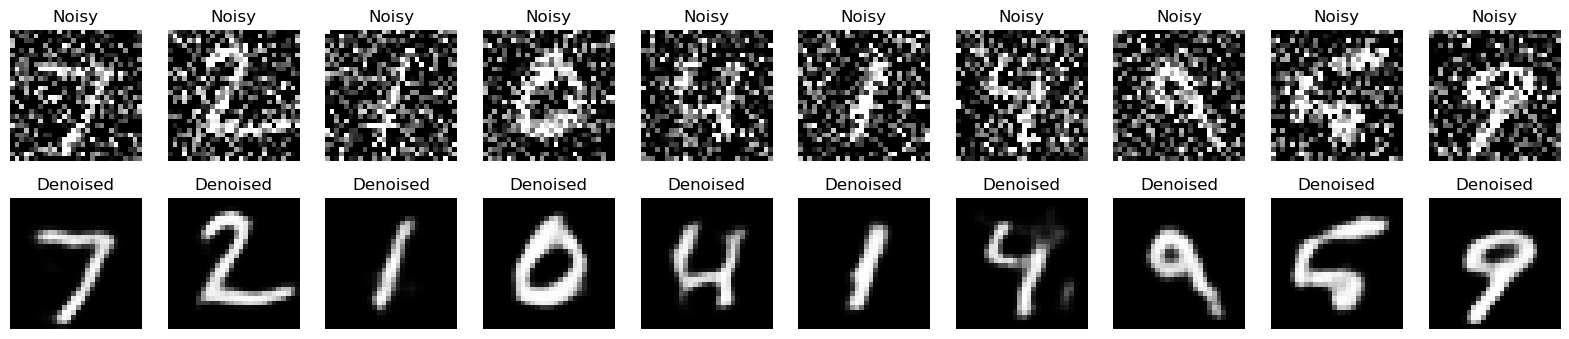

In [17]:
plt.figure(figsize=(20, 4))
for i in range(10):
    # Noisy input
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(X_test_noisy[i].squeeze(), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")

    # Denoised output
    ax = plt.subplot(2, 10, i + 11)
    plt.imshow(decoded_imgs[i].squeeze(), cmap="gray")
    plt.title("Denoised")
    plt.axis("off")
plt.show()
